In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Integration time
Tmax = 12*3600
# Number of particles
Np = 1000

Text(0, 0.5, 'Variance [m$^2$]')

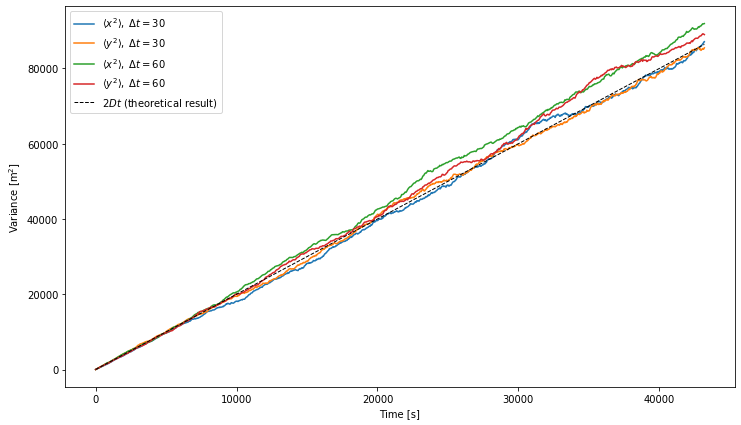

In [3]:
######################################
#### Move particles with standard ####
#### random walk, diffusivity D   ####
######################################

# Diffusivity
D = 1
# Initial particle positions
X0 = np.zeros((2, Np))
# Create figure
fig = plt.figure(figsize = (12, 7))

# Do calculations with two different timesteps
for dt in [30, 60]:
    # Number of timesteps
    Nt   = int(Tmax/dt)
    # All particle positions
    X = np.zeros((2, Np, Nt+1))
    # Loop over time
    for i in range(Nt):
        X[:,:,i+1] = X[:,:,i] + np.sqrt(2*D)*np.random.normal(loc = 0, scale = np.sqrt(dt), size = X0.shape)

    # Calculate variance
    varx = np.var(X[0,:,:], axis = 0)
    vary = np.var(X[1,:,:], axis = 0)
    # Plot variance
    times = np.linspace(0, Tmax, Nt+1)
    plt.plot(times, varx, label = f'$\langle x^2 \\rangle,\;\Delta t = {dt}$')
    plt.plot(times, vary, label = f'$\langle y^2 \\rangle,\;\Delta t = {dt}$')

# Plot theoretical variance for diffusivity D: <x(t)^2> = 2*D*t
plt.plot(times, 2*D*times, '--', c = 'k', lw = 1, label = '$2Dt$ (theoretical result)')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Variance [m$^2$]')

Text(0, 0.5, 'Variance [m$^2$]')

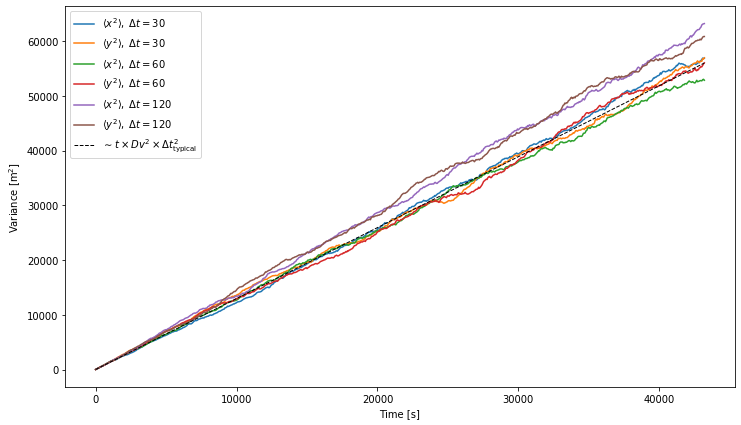

In [43]:
######################################
#### Move particles with          ####
#### random velocity components   ####
######################################

# Standard deviation in velocity
Dv = 0.15 # m/s
# Initial particle positions
X0 = np.zeros((2, Np))
# Create figure
fig = plt.figure(figsize = (12, 7))

# Typical timestep, we want to maintain the behaviour at other timesteps as well
dt_typical = 60

# Do calculations with two different timesteps
for dt in [30, 60, 120]:
    # All particle positions
    X = np.zeros((2, Np, Nt+1))
    # Loop over time
    for i in range(Nt):
        X[:,:,i+1] = X[:,:,i] + np.random.normal(loc = 0, scale = Dv*dt_typical/dt, size = X0.shape)*dt

    # Calculate variance
    varx = np.var(X[0,:,:], axis = 0)
    vary = np.var(X[1,:,:], axis = 0)
    # Plot variance
    times = np.linspace(0, Tmax, Nt+1)
    plt.plot(times, varx, label = f'$\langle x^2 \\rangle,\;\Delta t = {dt}$')
    plt.plot(times, vary, label = f'$\langle y^2 \\rangle,\;\Delta t = {dt}$')

# Plot "theoretical" variance
plt.plot(times, 0.016*dt_typical**2*Dv**2*times, '--', c = 'k', lw = 1, label = f'$\sim t \\times Dv^2 \\times {{\Delta t}}_\mathrm{{typical}}^2$')

plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Variance [m$^2$]')